In [52]:
import wikipedia
import json
from bs4 import BeautifulSoup 
import requests
import re
import random
import ast
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sys import maxsize

In [53]:
links_list = ["https://en.wikipedia.org/w/index.php?title=Special%3AWhatLinksHere&target=Greek&namespace=0",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Existence&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Reason&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Knowledge&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Value_(ethics)&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Mind&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Language&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Pythagoras&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosophical_methodology&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Questioning&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosopher&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Ancient_Greek&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Aristotle&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Natural_philosophy&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Astronomy&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Medicine&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Physics&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Newton&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosophi%C3%A6_Naturalis_Principia_Mathematica&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Research_university&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Alain_Connes&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Arithmetic_mean&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Abacus&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Asia&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Algorithms_(journal)&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Axiom_of_choice&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Axiom&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Alpha&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Absolute_value&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special%3AWhatLinksHere&target=Analysis&namespace=0",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Automorphism&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Artificial_intelligence&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Acoustics&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Area&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Associative_property&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Archimedes&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Algebraic_geometry&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Algebraic_geometry&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Angular_momentum&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Arithmetic&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Science&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Anthropology&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Anatomy&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Ambiguity&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Axiom&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Artificial_intelligence&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Acoustics&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Adam_Smith&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Astrology&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Anti-realism&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Archaeoastronomy&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Chemistry&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Biochemistry&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Benjamin_Franklin&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Bulgarian_language&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Baghdad&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Biotechnology&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Civil_engineering&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Cooking&namespace=0&limit=50",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Computer_science&namespace=0&limit=50",
         "https://en.wikipedia.org/wiki/Special:WhatLinksHere/Biography",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Attila",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=August+Derleth",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Miss+Marple",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Amathus",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Autobiography",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Christopher+Marlowe",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Dracula",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Historiography",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Hesiod",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Hero",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Livy",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Liber+Pontificalis",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Library+of+Congress+Classification",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Musicology",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Murray+Gell-Mann",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Michelangelo",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Nonfiction",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Roy+Jenkins",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Samuel+Butler+%28poet%29",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=40s",
         "https://en.wikipedia.org/wiki/Special:WhatLinksHere/Logic",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Anarchism",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Aristotle",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Altruism",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Arthur+Schopenhauer",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Albert+Einstein",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Algorithm",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Axiom",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Avicenna",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Analysis",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Artificial+intelligence",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Ancient+philosophy",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Afterlife",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Alan+Turing",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Animism",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Albertus+Magnus",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Alexander+of+Aphrodisias",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Adam+Smith",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Augustine+of+Hippo",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=Aesthetics",
       "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere&target=List+of+artificial+intelligence+projects"
        ]
len(links_list)

102

In [60]:
allclusters = {}
for item in links_list:
    url = item
    data  = requests.get(url).text 
    soup = BeautifulSoup(data,"html5lib")
    name = soup.find('title')
    name = name.string
    start= '"'
    end = '"'
    title= (name.split(start))[1].split(end)[0]
    articlelinks = []
    paras = soup.find_all('ul',{"id": "mw-whatlinkshere-list"})
    for para in paras:
        links = para.find_all('a')
        for link in links:
            data = re.findall('href="/wiki/', str(link))
            if len(data)!=0:
                x = re.findall("\[*\]", str(link.string))
                if len(x)==0:
                    articlelinks.append(link.string)
    allclusters[title]=articlelinks
allclusters
len(allclusters)

93

In [61]:
allclusters_matrix1 = [[0 for x in range(93)] for x in range(93)]
for i in range(93):
    for j in range(93):
        allclusters_matrix1[i][j] = 0

In [62]:
allclusters_matrix = [[0 for x in range(93)] for x in range(93)]
for i in range(93):
    for j in range(93):
        allclusters_matrix[i][j] = 1000

In [63]:
allclusters_list = list(allclusters)
len(allclusters_list)

93

In [64]:
allclusters_list = list(allclusters)
#count=0
j=0
k=0
#l=0
for x in range(93):
    for y in range(93):
        #print("\niteration")
        #print(x)
        #print("j=")
        #print(x)
        #print(" k=")
        #print(y)
        list1=allclusters[allclusters_list[x]]
        list2=allclusters[allclusters_list[y]]
        #print(list1)
        #print(list2)
        a=len(list1)
        b=len(list2)
        count=0
        for m in range(a):
            l=0
            for n in range(b):
                #print(count)
                if(list2[n]==list1[m]):
                    #print(list2[n]+ "\t" +list1[m])
                    count+=1
                    #print(count)
        #print(count)
        if(count>5):
            matrix[x][y]=count
            matrix1[x][y]=count
            print(allclusters_list[x] + " and " + allclusters_list[y])
            #print(x)
            #print(y)
            #print("\n")
#print(matrix)
print(matrix1)

Greek and Greek
Existence and Existence
Existence and Reason
Existence and Knowledge
Existence and Value (ethics)
Existence and Mind
Existence and Philosopher
Existence and Natural philosophy
Existence and Axiom
Existence and Ambiguity
Existence and Anti-realism
Existence and Logic
Existence and Anarchism
Existence and Altruism
Existence and Arthur Schopenhauer
Existence and Avicenna
Existence and Ancient philosophy
Existence and Afterlife
Existence and Aesthetics
Reason and Existence
Reason and Reason
Reason and Knowledge
Reason and Value (ethics)
Reason and Mind
Reason and Philosopher
Reason and Natural philosophy
Reason and Axiom
Reason and Science
Reason and Adam Smith
Reason and Anti-realism
Reason and Benjamin Franklin
Reason and Logic
Reason and Anarchism
Reason and Avicenna
Reason and Ancient philosophy
Reason and Afterlife
Reason and Animism
Reason and Aesthetics
Knowledge and Existence
Knowledge and Reason
Knowledge and Knowledge
Knowledge and Value (ethics)
Knowledge and Min

Adam Smith and Reason
Adam Smith and Value (ethics)
Adam Smith and Natural philosophy
Adam Smith and Science
Adam Smith and Adam Smith
Adam Smith and Anti-realism
Adam Smith and Benjamin Franklin
Adam Smith and Logic
Adam Smith and Anarchism
Adam Smith and Arthur Schopenhauer
Adam Smith and Avicenna
Adam Smith and Ancient philosophy
Adam Smith and Afterlife
Adam Smith and Animism
Adam Smith and Augustine of Hippo
Adam Smith and Aesthetics
Astrology and Astronomy
Astrology and Medicine
Astrology and Astrology
Astrology and Avicenna
Astrology and Afterlife
Anti-realism and Existence
Anti-realism and Reason
Anti-realism and Knowledge
Anti-realism and Value (ethics)
Anti-realism and Mind
Anti-realism and Philosopher
Anti-realism and Aristotle
Anti-realism and Natural philosophy
Anti-realism and Axiom
Anti-realism and Adam Smith
Anti-realism and Anti-realism
Anti-realism and Benjamin Franklin
Anti-realism and Logic
Anti-realism and Anarchism
Anti-realism and Arthur Schopenhauer
Anti-realism

Augustine of Hippo and Adam Smith
Augustine of Hippo and Anti-realism
Augustine of Hippo and Benjamin Franklin
Augustine of Hippo and Logic
Augustine of Hippo and Anarchism
Augustine of Hippo and Arthur Schopenhauer
Augustine of Hippo and Avicenna
Augustine of Hippo and Ancient philosophy
Augustine of Hippo and Afterlife
Augustine of Hippo and Animism
Augustine of Hippo and Albertus Magnus
Augustine of Hippo and Alexander of Aphrodisias
Augustine of Hippo and Augustine of Hippo
Augustine of Hippo and Aesthetics
Aesthetics and Existence
Aesthetics and Reason
Aesthetics and Knowledge
Aesthetics and Value (ethics)
Aesthetics and Mind
Aesthetics and Language
Aesthetics and Philosopher
Aesthetics and Aristotle
Aesthetics and Axiom
Aesthetics and Anthropology
Aesthetics and Adam Smith
Aesthetics and Anti-realism
Aesthetics and Benjamin Franklin
Aesthetics and Logic
Aesthetics and Anarchism
Aesthetics and Altruism
Aesthetics and Arthur Schopenhauer
Aesthetics and Avicenna
Aesthetics and Ancie

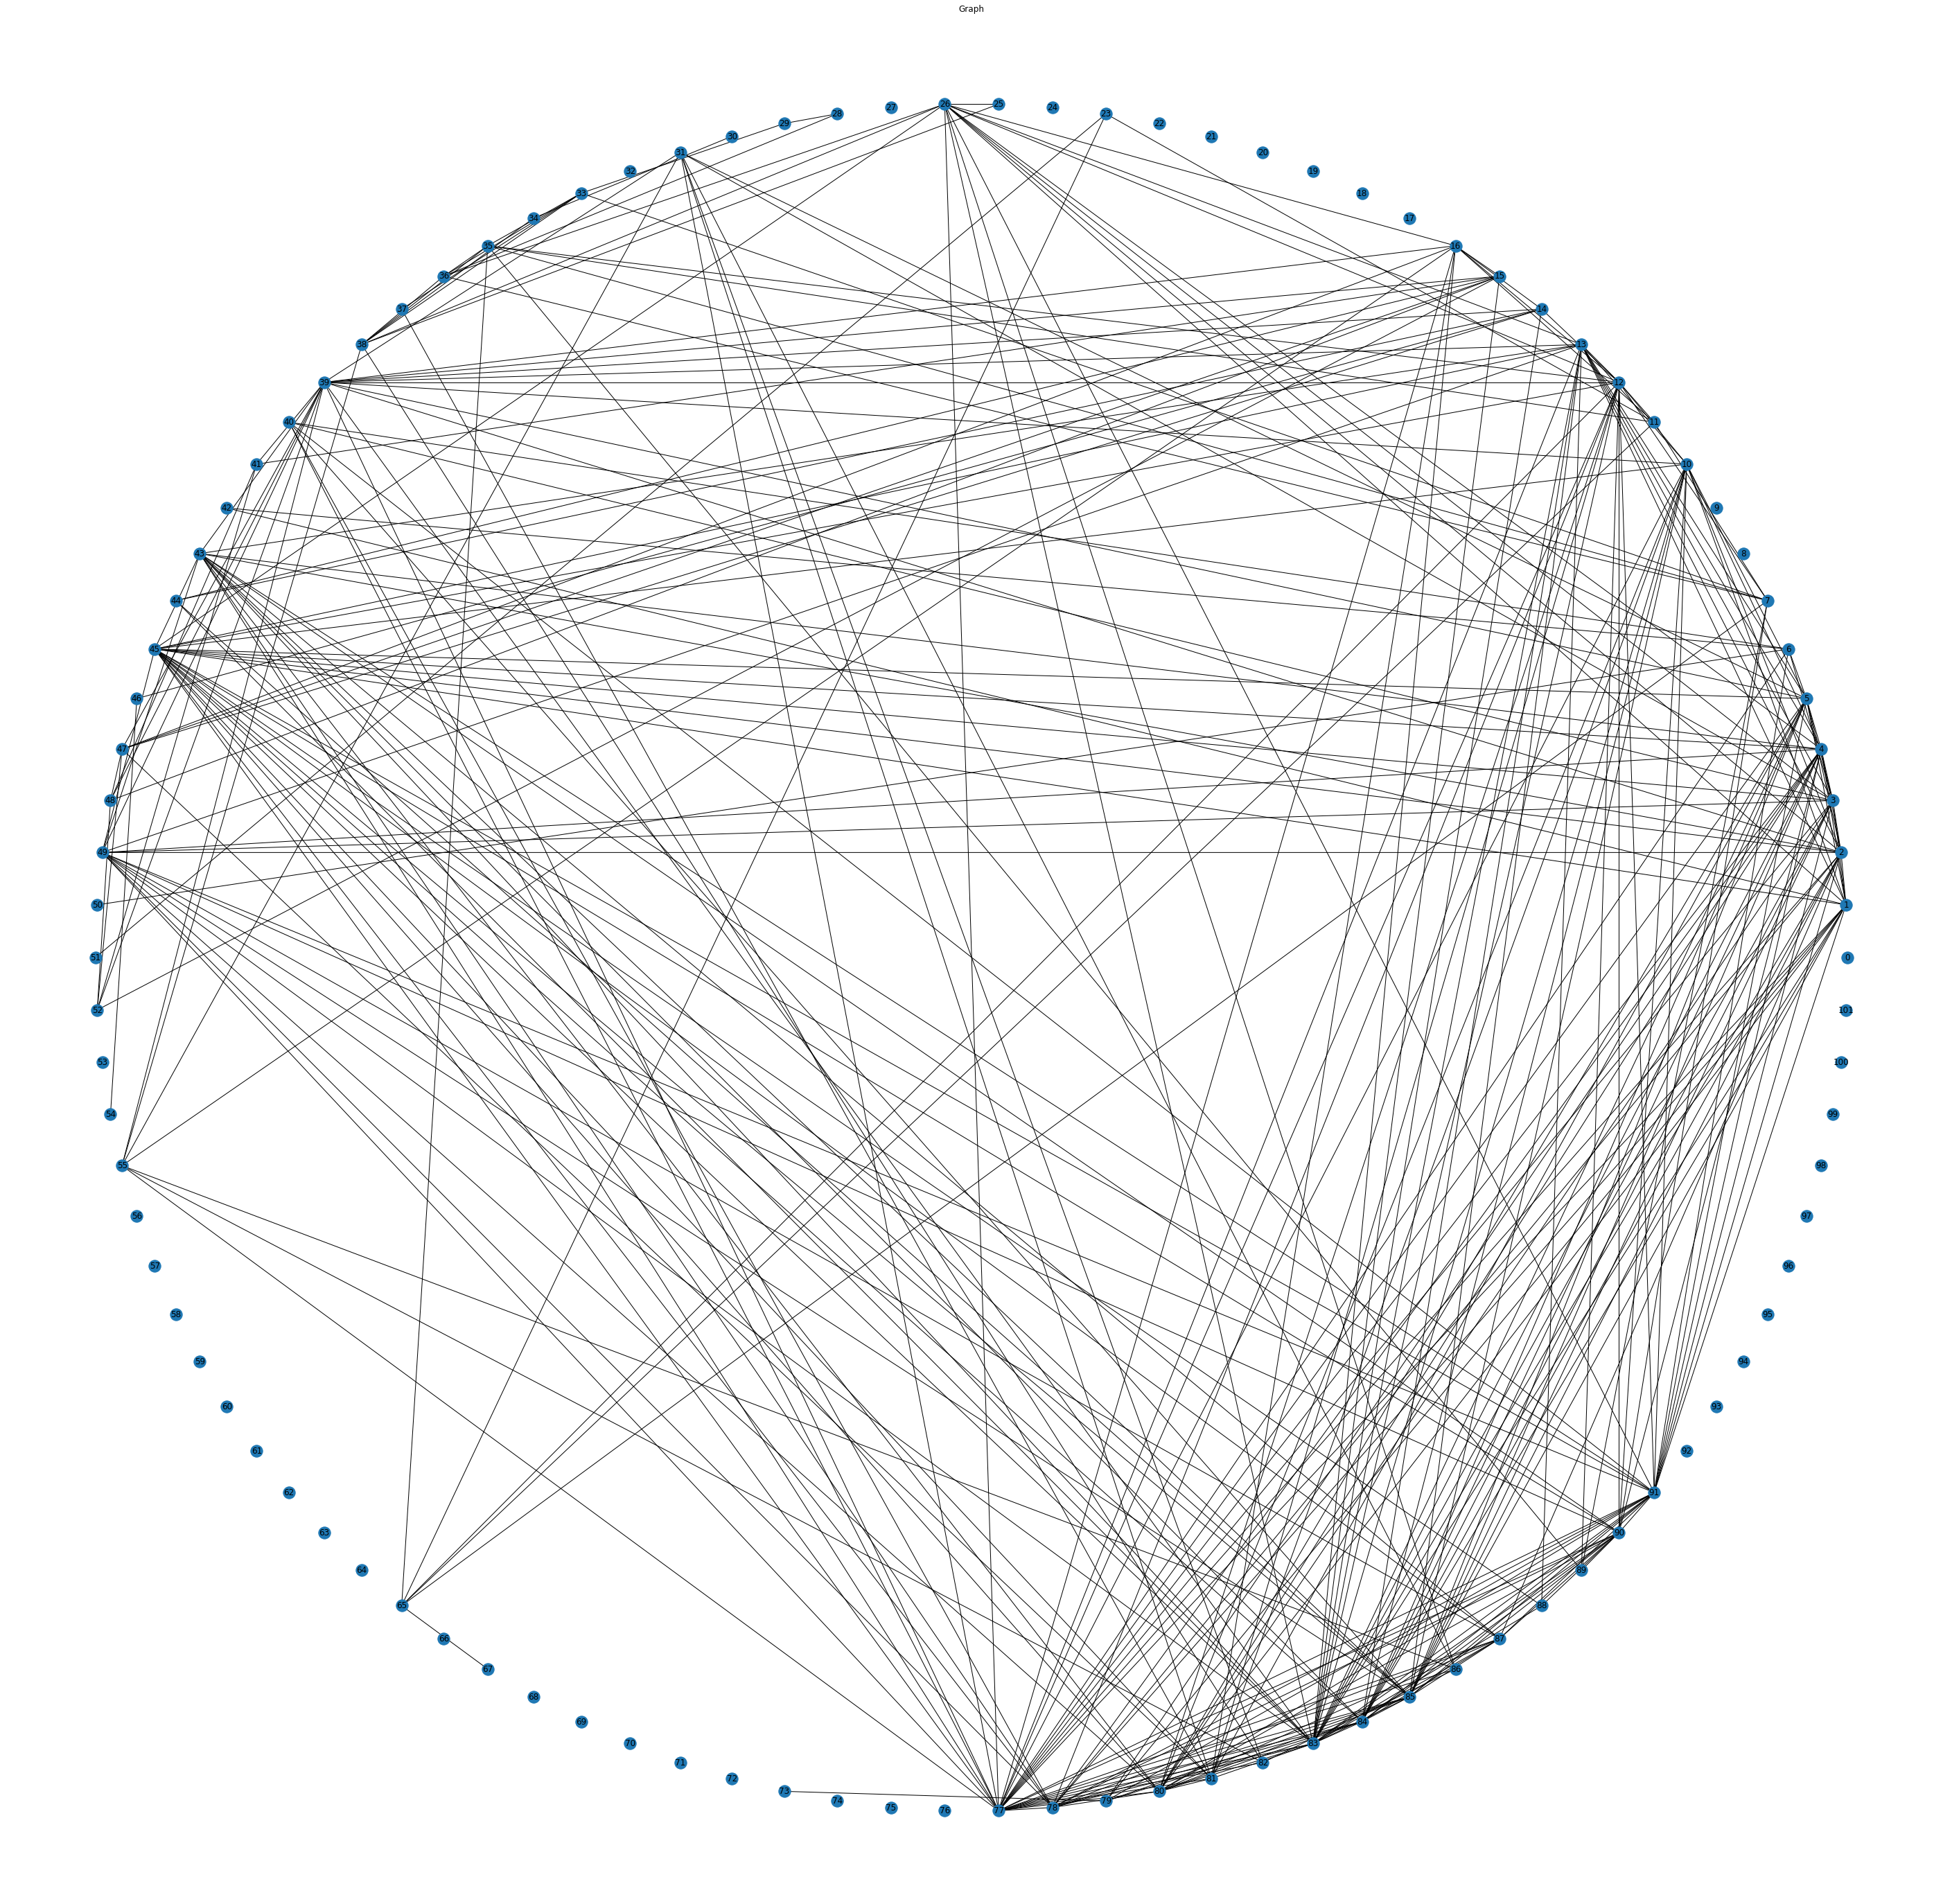

In [82]:
#for index,article in enumerate(allclusters_list):
    #print(index," ",article)
df = pd.DataFrame(data=matrix1)

plt.figure(3,figsize=(50,50))
plt.title("Graph")
G = nx.OrderedGraph(df.values)
nx.draw_circular(G, with_labels=True)
plt.show()

In [66]:
tree = [[0 for x in range(93)] for x in range(93)]
for i in range(93):
    for j in range(93):
        tree[i][j] = 0

In [86]:

from sys import maxsize
INT_MAX = maxsize
V = 93
def isValidEdge(u, v, inMST):
    if u == v:
        return False
    if inMST[u] == False and inMST[v] == False:
        return False
    elif inMST[u] == True and inMST[v] == True:
        return False
    return True
 
def primMST(cost):
    inMST = [False] * V
    inMST[0] = True
    edge_count = 0
    mincost = 0
    while edge_count < V - 1:
 
        # Find minimum weight valid edge.
        minn = INT_MAX
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if cost[i][j] < minn:
                    if isValidEdge(i, j, inMST):
                        minn = cost[i][j]
                        a = i
                        b = j
 
        if a != -1 and b != -1:
            if((b-a)>=20):
                print("Edge %d: (%d, %d) cost: %d" %
                     (edge_count, a, b, minn))
            tree[a][b]=minn
            edge_count += 1
            mincost += minn
            inMST[b] = inMST[a] = True
 
    print("Minimum cost = %d" % mincost)

if __name__ == "__main__":

    primMST(matrix)
# sanjeev2552

Edge 1: (1, 26) cost: 6
Edge 2: (1, 42) cost: 6
Edge 3: (4, 26) cost: 6
Edge 4: (4, 90) cost: 6
Edge 6: (26, 83) cost: 6
Edge 7: (15, 83) cost: 6
Edge 8: (15, 44) cost: 6
Edge 9: (14, 44) cost: 6
Edge 15: (3, 31) cost: 6
Edge 16: (3, 49) cost: 6
Edge 17: (3, 77) cost: 6
Edge 18: (5, 39) cost: 6
Edge 19: (5, 85) cost: 6
Edge 20: (5, 91) cost: 6
Edge 21: (6, 50) cost: 6
Edge 24: (10, 84) cost: 6
Edge 25: (13, 88) cost: 6
Edge 26: (14, 46) cost: 6
Edge 27: (15, 47) cost: 6
Edge 28: (16, 77) cost: 6
Edge 30: (16, 55) cost: 6
Edge 31: (26, 86) cost: 6
Edge 33: (40, 85) cost: 6
Edge 34: (40, 78) cost: 6
Edge 35: (45, 88) cost: 6
Edge 37: (47, 81) cost: 6
Edge 38: (49, 87) cost: 6
Edge 41: (7, 89) cost: 6
Edge 42: (35, 89) cost: 6
Edge 46: (38, 82) cost: 6
Edge 47: (3, 80) cost: 7
Edge 48: (7, 33) cost: 7
Edge 57: (23, 51) cost: 6
Edge 58: (23, 65) cost: 7
Edge 66: (0, 20) cost: 1000
Edge 67: (0, 21) cost: 1000
Edge 68: (0, 22) cost: 1000
Edge 69: (0, 24) cost: 1000
Edge 70: (0, 27) cost: 100

In [84]:
for index,article in enumerate(allclusters_list):
    print(index," ",article)

0   Greek
1   Existence
2   Reason
3   Knowledge
4   Value (ethics)
5   Mind
6   Language
7   Pythagoras
8   Philosophical methodology
9   Questioning
10   Philosopher
11   Ancient Greek
12   Aristotle
13   Natural philosophy
14   Astronomy
15   Medicine
16   Physics
17   Newton
18   Philosophiæ Naturalis Principia Mathematica
19   Research university
20   Alain Connes
21   Arithmetic mean
22   Abacus
23   Asia
24   Algorithms (journal)
25   Axiom of choice
26   Axiom
27   Alpha
28   Absolute value
29   Analysis
30   Automorphism
31   Artificial intelligence
32   Acoustics
33   Area
34   Associative property
35   Archimedes
36   Algebraic geometry
37   Angular momentum
38   Arithmetic
39   Science
40   Anthropology
41   Anatomy
42   Ambiguity
43   Adam Smith
44   Astrology
45   Anti-realism
46   Archaeoastronomy
47   Chemistry
48   Biochemistry
49   Benjamin Franklin
50   Bulgarian language
51   Baghdad
52   Biotechnology
53   Civil engineering
54   Cooking
55   Computer science
56   B

In [77]:
df1 = pd.DataFrame(data=tree)
plt.figure(3,figsize=(100,100))
G1 = nx.OrderedGraph(df1.values)
nx.draw_planar(G1, with_labels=True,node_size=5000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>